<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/Perceptr%C3%B3n-multicapa/Perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

# Perceptron Multicapa


El perceptron es de una de las estructuras más simples. Está basada en una neurona ligeramente diferente llamada unidad logica de umbral(TLU) o a veces llamada  unidad lineal de umbral(LTU). Las entradas y las salidas son numeros cada entrada a la conexión se asocia con un peso. Esta unidad computa una suma ponderada de sus entradas y luego aplica una función de activacion, en este caso una función de escalon, a esta suma. 
$$z = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = \boldsymbol{X^{T}}\boldsymbol{w}$$
$$h_{\boldsymbol{w}}(\boldsymbol{X}) = step(\boldsymbol{X^{T}}\boldsymbol{w})$$
# Image

 La función escalón más utilizada es la función escalón de Heaviside. La función de signo es utilizada también algunas veces.



In [ ]:
def heaviside(z):
  if z>=0:
    out = 1
  else:
    out = 0
  return out

In [ ]:
def sign(z):
  if z<0:
    out = -1
  elif z>0:
    out = 1
  else:
    out = 0
  return out  

Graficar funciones

La función escalón de Heaviside no es diferenciable en x=0 y tiene gradiente igual a cero en cualquier otro lugar, lo que significa que el descenso del gradiente no podrá actualizar los parametros. Por esta razón, está función no se utiliza en una red neuronal profunda.

In [38]:

class Perceptron(nn.Module):
  def __init__(self):
    super(Perceptron, self).__init__()
    self.fc = nn.Linear(1,1)
    self.relu = nn.ReLU() # Instead of Heaviside step fn

  def forward(self, x):
    output =  self.fc(x)
    output = self.relu(x)
    return output


In [41]:
class Feedforward(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Feedforward, self).__init__
    self.input_size = input_size
    self.hidden_size = hidden_size
    sel.f1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.fc2 =nn.Linear(self.hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output) # Binary Classification
    return output

In [50]:
#Create  artificial points
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): 
  target = np.copy(y)
  for l in loc:
    target [y == l] = label
    return target
x_train, y_train = make_blobs(n_samples = 40, n_features=2, cluster_std = 1.5, shuffle = True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train,0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))

x_test, y_test = make_blobs(n_samples = 10, n_features=2, cluster_std = 1.5, shuffle = True)
x_test = torch.FloatTensor(x_train)
y_test = torch.FloatTensor(blob_label(y_train,0, [0]))
y_test = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))







In [ ]:
model = Feedforward(2, 10)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.paramters(), lr = 0.01)

Este tipo de unidad se puede utilizar para realizar tareas simples de clasificación binaria. Por ejemplo, se podría utilizar un perceptrón para clasificar perros y gatos(tambien añadiendo un termino bias $x_{0}$).

# Crear un perceptrón simple para un dataset determinado y luego comparar las metricas de accuracy?

Un Perceptrón está simplemente compuesto de una capa  con unidades logicas de umbral(TLU´s) con cada TLU conectado a todas las entradas. Cuando todas las unidades o neuronas de una capa están conectadas a cada neurona o unidad anterior(es decir, sus neuronas o unidades de entrada) se denomina una capa densa o totalmente conectada.

Ilustración

El Perceptron multicapas

In [ ]:
## Dataset a utilizar

In [ ]:
   # exploración dataset

# Funciones de activación

---

Las funciones de activación cumplen dos roles muy importantes:
- En las partes internas del modelo permite que la función de salida tenga un valor de derivada diferente en diferentes puntos, algo que no lo puede lograr una función lineal por definición.
- Permiten concentrar las salidas de la función lineal en un rango de valores especificado.


---



## ¿Cómo escoger la función de activación?
Primero discutamos acerca de las generalidades de las funciones de activación:
- No son lineales: La no linealidad permite a la red aproximar funciones más complejas
- Son diferenciables: Esto significad que los gradientes se pueden calcular a través de ellas. Puntos de descontinuidad como se pueden ver en la función ReLu y Hardtanh están bien.

Sin estás caracteristicas, una red o se volverá dificil de entrenar o se coonvierte en un modelo lineal. 
Lo siguiente es cierto para estas funciones:
- Tienen por lo menos un rango sensitivo, donde un cambio no trivial en la entrada resulta en un cambio no trivial en la salida, lo cual es necesario para el entrenamiento
- Muchas de ellas tienen un rango no sensitivo(o sasturado ), en el cual los cambios en la entrada reflejan un cambio muy pequeño o casi despreciable en la salida. 


---


Si tenemos en cuenta la propagación hacía atrás, podemos deducir que los errores se propagarán a través de la función de activación de manera más eficaz,si las entradas se encuentran en el rango de respuesta(sensitivo) y pasará lo contrario cuando estén en en rango saturado, debido a que el gradiente será cercano a cero. 


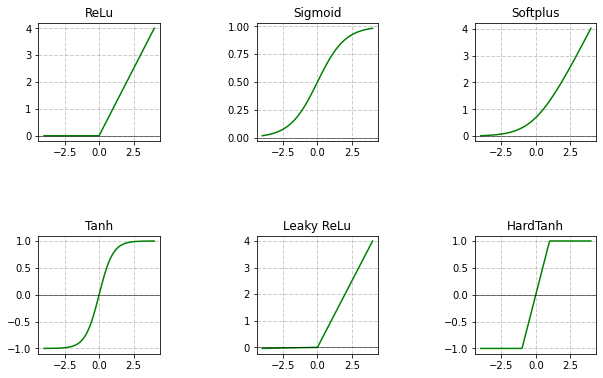

In [1]:
## Algunas funciones de activación utilizando PyTorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


x_axe = np.linspace(-4, 4, 200)
input = torch.from_numpy(x_axe)
output_relu = nn.ReLU()(input).numpy() # ReLU
output_softmax = nn.Softplus()(input).numpy() # Softplus
output_sigmoid = nn.Sigmoid()(input).numpy() # Sigmoid
output_leakyR = nn.LeakyReLU()(input).numpy() # Leaky ReLu
output_tanh = nn.Tanh()(input).numpy() # Tanh
output_hardtanh = nn.Hardtanh()(input).numpy() # HardTanh
outputs1 = {'ReLu': output_relu, 'Sigmoid': output_sigmoid, 'Softplus': output_softmax, 
            'Tanh': output_tanh, 'Leaky ReLu': output_leakyR, 'HardTanh': output_hardtanh}
i = 1
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for key in outputs1.keys():
  ax = fig.add_subplot(3, 3, i)
  ax.plot(x_axe,outputs1[key],"g-")
  ax.set_title(key)
  ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  # Pintar los ejes pasando por (0,0)
  ax.axhline(0, color='black', linewidth=0.5)

  i+=1


plt.show()




Optimizadores
SGD
RMSPROP
Adam

In [3]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

Cada constructor de un optimizador toma una lista de parametros como primer argumento. Todos los parametros que son pasados al optimizador son retenidos dentro de esta instancia de modo que este puede actualizar sus valores y acceder al atributo .grad. Cada optimizador expone dos metodos zero_grad y step. 
zero_grad pone en cero el atributo .grad de los parametros pasados al optimizador mediante su constructor.
step actualiza el valor de estos parametros de acuerdo al metodo de optimización escogido

In [ ]:
Bath y epochs

In [ ]:
torch.optim.Adam
torch.optim.Adagrad
torch.optim.Adamax
torch.optim.SparseAdam
torch.optim.Adadelta
torch.optim.ASGD
torch.optim.RMSprop
torch.optim.Rprop
torch.optim.SGD
torch.optim.SparseAdam
torch.optim.LBFGS()
torch.optim.Optimizer


In [6]:
from torchvision import datasets
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path =   './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
import torchvision
batch_size = 8
trainloader = torch.utils.data.DataLoader(cifar10, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar10_val, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

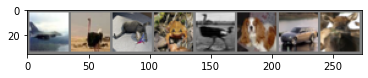

plane  bird   cat  frog  bird   dog   car  deer


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Keras implementación


In [36]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.f1 = nn.Linear(32 * 32 * 3, 84)
    self.f2 = nn.Linear(84, 10)
    self.relu = torch.nn.ReLU()
    self.softmax = torch.nn.Softmax()
    
  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x = self.relu(self.f1(x))
    x = self.f2(x)
    return x
mlp = MLP()

In [14]:
import torch.optim as optim

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [39]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
Finished Training


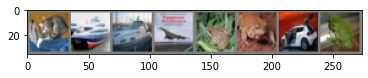

GroundTruth:    cat  ship  ship plane


In [42]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Pytorch Implementacion

In [ ]:
n_out = 2
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(32*32*3, 512), ## 512 number of hidden features, arbitrary value  32*32*3 = Number of inputs
        nn.ReLU(),
        nn.Linear(512, n_out)   # Output classes 
        nn.Softmax()  ## Produce probabilities
    )


In [43]:
outputs = mlp(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [44]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog truck  deer   dog


In [46]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Accuracy of the network on the 10000 test images: 11 %


In [48]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Accuracy for class plane is: 0.0 %
Accuracy for class car   is: 5.6 %
Accuracy for class bird  is: 0.2 %
Accuracy for class cat   is: 15.2 %
Accuracy for class deer  is: 40.6 %
Accuracy for class dog   is: 30.2 %
Accuracy for class frog  is: 12.4 %
Accuracy for class horse is: 0.5 %
Accuracy for class ship  is: 1.1 %
Accuracy for class truck is: 4.2 %
